In [1]:
import numpy as np
import time
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Data Generation

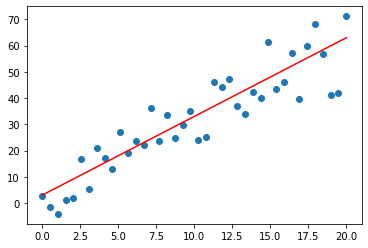

In [2]:
sample = 40

x_train = np.linspace(0, 20, sample)
y_train = 3*x_train + (2+ 8*np.random.randn(sample) + np.arcsinh(np.random.randn()))

plt.scatter(x_train, y_train)
plt.plot(x_train, 3*x_train+3, "r")

# PlaceHolder

These will be used to feed data during the training, validation and evalution phase.

In [3]:
X = tf.placeholder(dtype=tf.float32, shape=None)
Y = tf.placeholder(dtype=tf.float32, shape=None)

# Parameters

These will be learned during the training.

In [4]:
W = tf.Variable(np.random.randint(0,100,1), dtype=tf.float32, name="weight")
b = tf.Variable(np.random.randint(0,100,1), dtype=tf.float32, name="bias")

# Model

This represent our belief about the data.

In [5]:
Y_pred = X*W + b

# Cost

Its gradient with respect ot parametrs will be used to update the network parametrs.

In [6]:
cost = tf.reduce_sum((Y_pred - Y) ** 2) / (2 * sample)

tf_cost_summary = tf.summary.scalar('loss', cost)

# Optimizer

It represents the numerical method which will be used to calcualte the gradient.

In [7]:
learning_rate = 0.1

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer_task = optimizer.minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
"""
gradients = optimizer.compute_gradients(cost)

tf_gradnorm_summary = tf.summary.scalar('grad_norm',0)
for g,v in gradients:
    if 'weights' in v.name:
        with tf.name_scope('gradients'):
            tf_last_grad_norm = tf.sqrt(tf.reduce_mean(g**2))
            tf_gradnorm_summary = tf.summary.scalar('grad_norm', tf_last_grad_norm)
            break
"""

"\ngradients = optimizer.compute_gradients(cost)\n\ntf_gradnorm_summary = tf.summary.scalar('grad_norm',0)\nfor g,v in gradients:\n    if 'weights' in v.name:\n        with tf.name_scope('gradients'):\n            tf_last_grad_norm = tf.sqrt(tf.reduce_mean(g**2))\n            tf_gradnorm_summary = tf.summary.scalar('grad_norm', tf_last_grad_norm)\n            break\n"

# Variable Initializer

Upto now only the layout of computation graph has been created. Now, we have to initilize the graph parameters.

In [9]:
initialize = tf.global_variables_initializer()

# Training

Here a session will be created. Tenserflow graph are accessed with the help of session. The method which is displayed down is called lazy evaluation method.

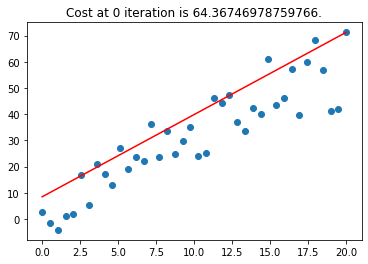

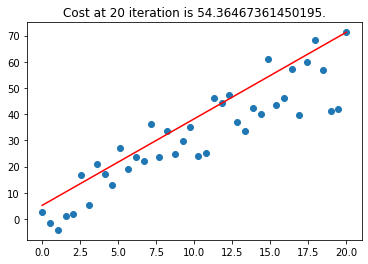

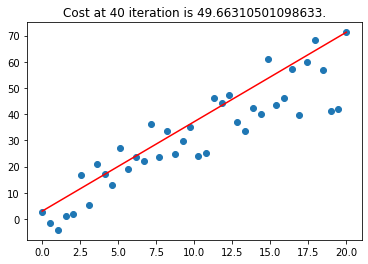

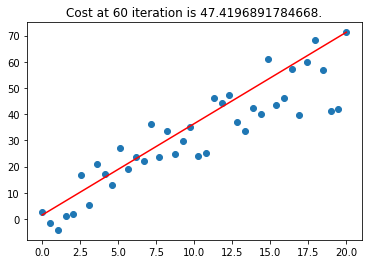

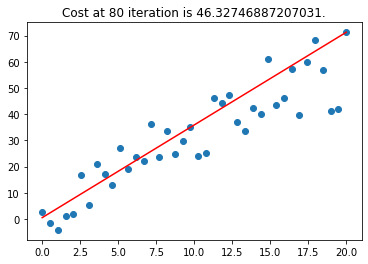

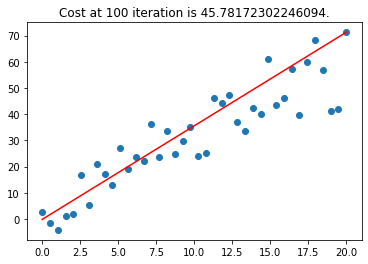

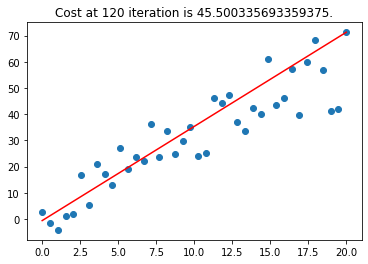

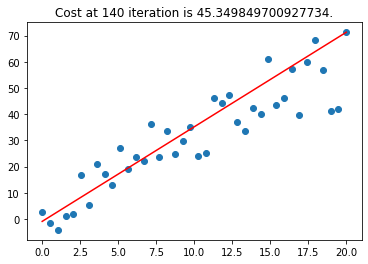

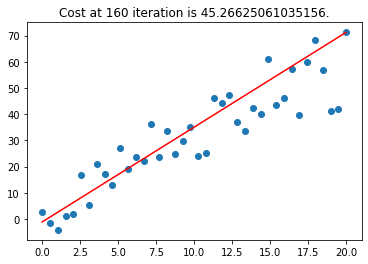

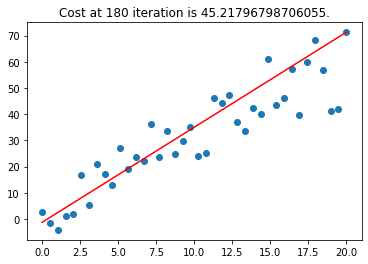

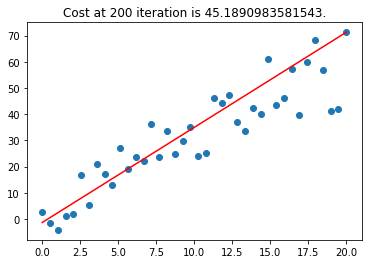

In [10]:
epochs=200

train_loss = []

with tf.Session() as sess:
    summ_writer = tf.summary.FileWriter('./logs/{}'.format(time.time()), sess.graph)
    sess.run(initialize)

    for epoch in range(epochs+1):
        epoch_mean_loss = []
        for x,y in zip(x_train, y_train):
            loss = sess.run(optimizer_task, feed_dict = {
                                            X: x,
                                            Y: y
                                          })
            #summ_writer.add_summary(grad_summ, epoch)
            c_value = sess.run(cost, feed_dict = {
                                          X: x_train,
                                          Y: y_train
                                        })
            epoch_mean_loss.append(c_value)
        
        train_loss.append(np.mean(epoch_mean_loss))
        
        # To visualize the training with hyperplane
        if not epoch % 20:
            c_value = sess.run(cost, feed_dict = {
                                          X: x_train,
                                          Y: y_train
                                        })
            w_value = sess.run(W)
            b_value = sess.run(b)

            plt.scatter(x_train, y_train)
            plt.plot(x_train, w_value*x_train + b_value, "r")
            plt.title("Cost at {} iteration is {}.".format(epoch, c_value))
            plt.show()


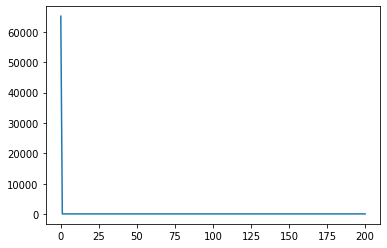

In [11]:
plt.plot(train_loss)